In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")

In [3]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [5]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [6]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [7]:
df.shape

(7752, 25)

In [8]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [9]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [10]:
df['station'].iloc[7750]=1.0
df['station'].iloc[7751]=2.0

In [11]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,1.0,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [12]:
df['Date'].iloc[7750]= '31-08-2017'
df['Date'].iloc[7751]='31-08-2017'

In [13]:
df.isnull().sum()

station              0
Date                 0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [14]:
df.drop(columns = ['lat','lon'], inplace=True)

In [15]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.130928,0.000000,0.000000,0.000000,0.000000,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.127727,0.000000,0.000000,0.000000,0.000000,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.142125,0.000000,0.000000,0.000000,0.000000,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.134249,0.000000,0.000000,0.000000,0.000000,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.170021,0.000000,0.000000,0.000000,0.000000,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,0.000000,0.000000,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,0.000000,0.000000,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000796,0.000000,0.000000,0.000000,0.000000,19.5844,0.271300,4451.345215,27.8,17.4
7750,1.0,31-08-2017,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,0.000000,0.000000,12.3700,0.098475,4329.520508,17.4,11.3


In [16]:
for col in df.columns:
    if col not in ['station','Date']:
       df[col]= df[col].replace(np.nan,df[col].median())

In [17]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [18]:
df.drop(columns = ['station','Date'], inplace=True)

In [19]:
#df['Date']=pd.to_datetime(df['Date'])

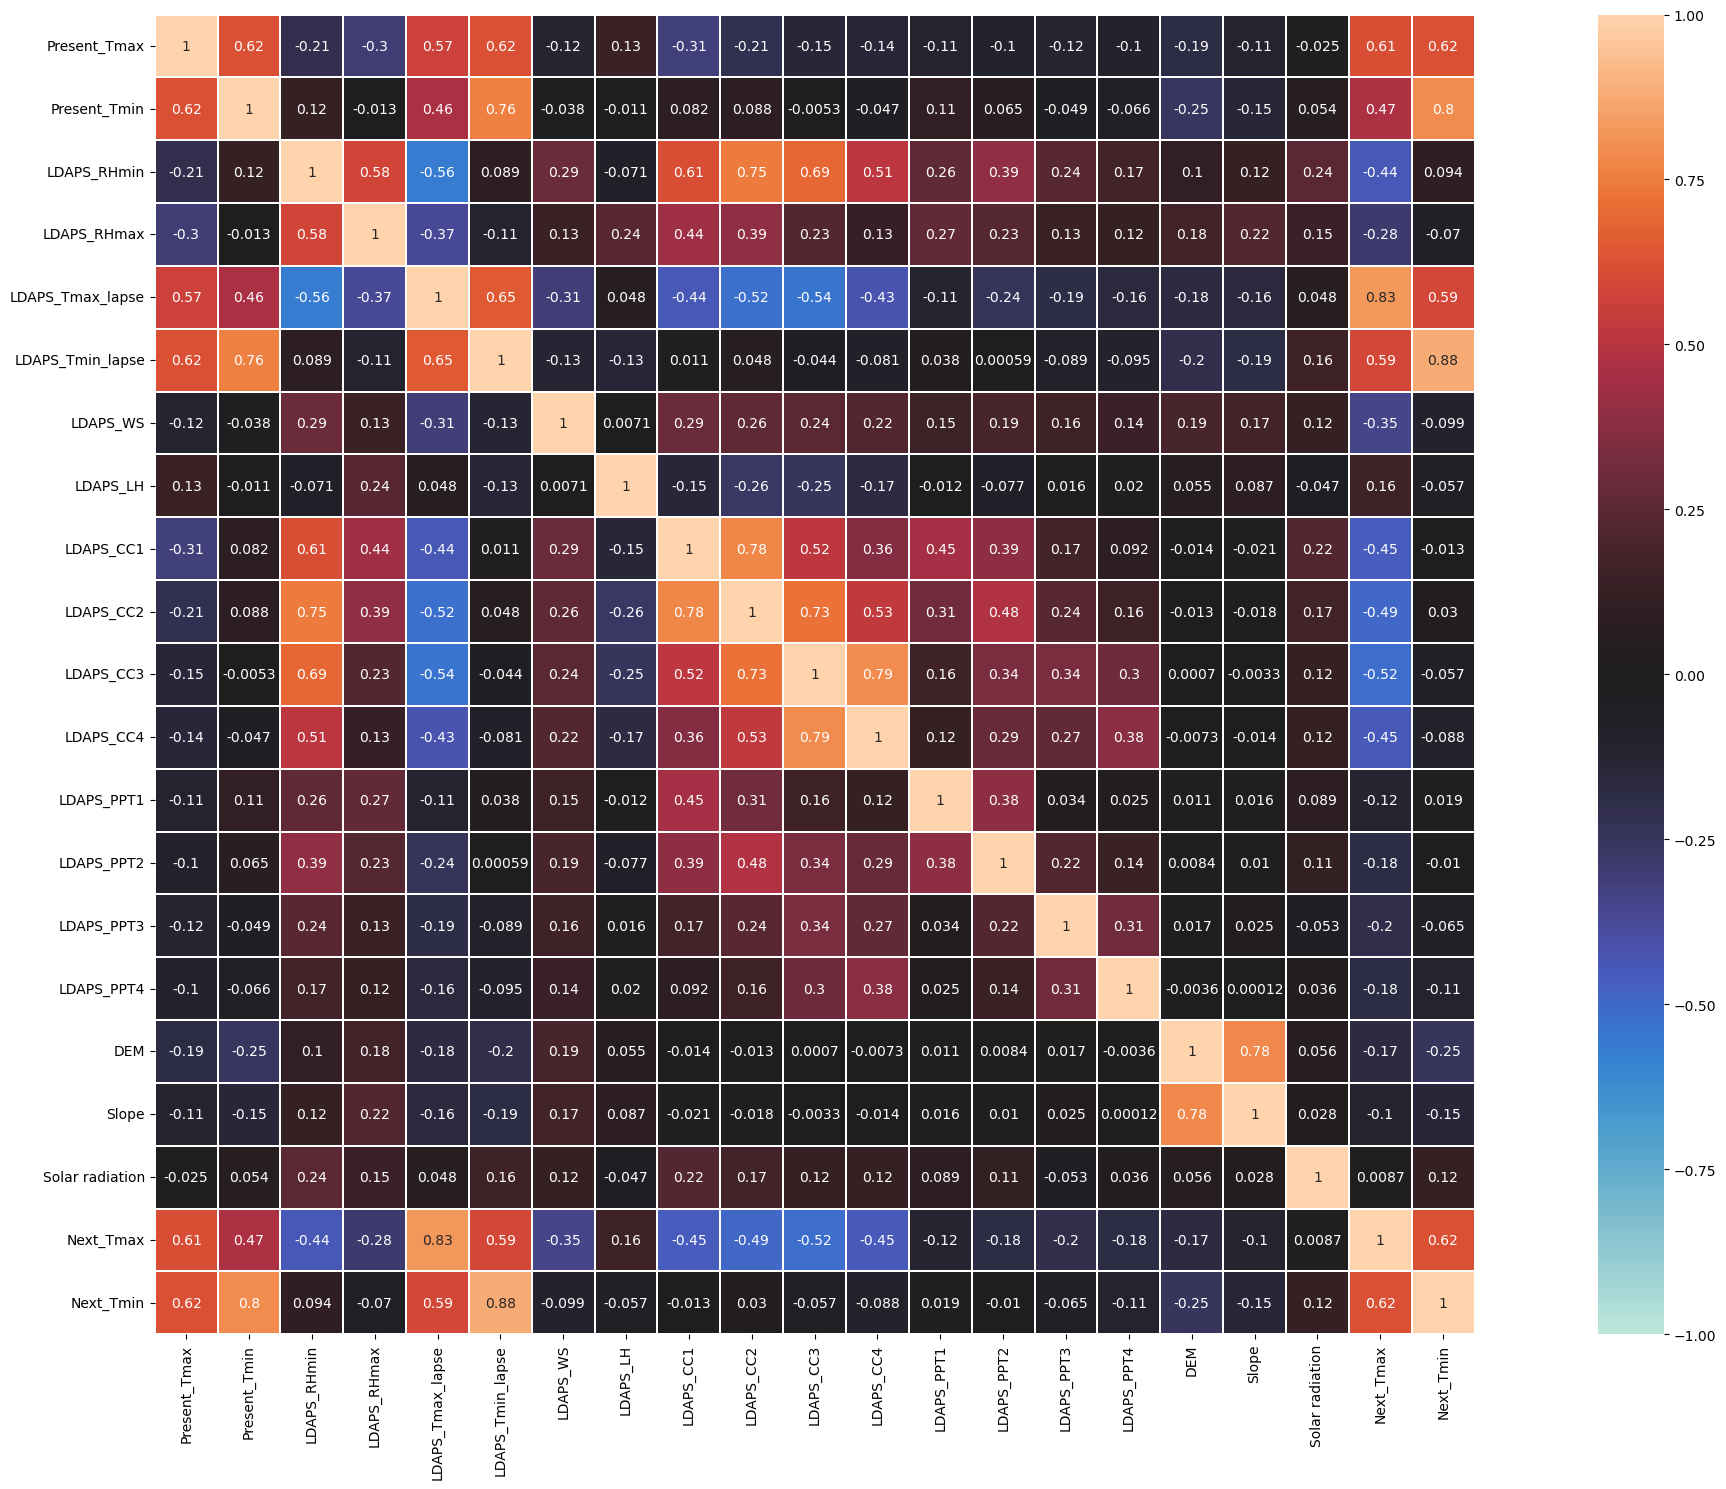

In [20]:
#Now plot heatmap
df_corr=df.corr()
plt.figure(figsize=(25,15))
sns.heatmap(df_corr,vmin=-1, vmax=1, annot=True, square=True, center=0,fmt='.2g', linewidths =0.1)
plt.tight_layout()


In [21]:
df.skew()

Present_Tmax       -0.265337
Present_Tmin       -0.369481
LDAPS_RHmin         0.303565
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.228767
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.465003
LDAPS_CC2           0.477041
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340943
Next_Tmin          -0.405143
dtype: float64

In [22]:
df.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [23]:
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1',
                    'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4','DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score <3).all(axis=1)
df = df[filtering_entry]
df.reset_index(inplace = True)


In [24]:
df.skew()

index               0.001825
Present_Tmax       -0.225318
Present_Tmin       -0.210971
LDAPS_RHmin         0.284029
LDAPS_RHmax        -0.757726
LDAPS_Tmax_lapse   -0.094584
LDAPS_Tmin_lapse   -0.366067
LDAPS_WS            1.028108
LDAPS_LH            0.602758
LDAPS_CC1           0.487718
LDAPS_CC2           0.473511
LDAPS_CC3           0.643133
LDAPS_CC4           0.679945
LDAPS_PPT1          5.271762
LDAPS_PPT2          5.724629
LDAPS_PPT3          6.715920
LDAPS_PPT4          6.825638
DEM                 1.778212
Slope               1.602414
Solar radiation    -0.502651
Next_Tmax          -0.263537
Next_Tmin          -0.215699
dtype: float64

In [25]:
#

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7468 entries, 0 to 7467
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             7468 non-null   int64  
 1   Present_Tmax      7468 non-null   float64
 2   Present_Tmin      7468 non-null   float64
 3   LDAPS_RHmin       7468 non-null   float64
 4   LDAPS_RHmax       7468 non-null   float64
 5   LDAPS_Tmax_lapse  7468 non-null   float64
 6   LDAPS_Tmin_lapse  7468 non-null   float64
 7   LDAPS_WS          7468 non-null   float64
 8   LDAPS_LH          7468 non-null   float64
 9   LDAPS_CC1         7468 non-null   float64
 10  LDAPS_CC2         7468 non-null   float64
 11  LDAPS_CC3         7468 non-null   float64
 12  LDAPS_CC4         7468 non-null   float64
 13  LDAPS_PPT1        7468 non-null   float64
 14  LDAPS_PPT2        7468 non-null   float64
 15  LDAPS_PPT3        7468 non-null   float64
 16  LDAPS_PPT4        7468 non-null   float64


In [27]:
x=df.drop(['Next_Tmax','Next_Tmin'],axis=1)
y=df[['Next_Tmax','Next_Tmin']]
y

,Next_Tmax,Next_Tmin
0,29.1,21.2
1,30.5,22.5
2,31.1,23.9
3,31.7,24.3
4,31.2,22.5
...,...,...
7463,27.6,17.7
7464,28.0,17.1
7465,28.3,18.1
7466,28.6,18.8


In [28]:
x

,index,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation
0,0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,0.0,0.0,0.0,0.0,212.3350,2.7850,5992.895996
1,1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,0.0,0.0,0.0,44.7624,0.5141,5869.312500
2,2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,0.0,0.0,0.0,33.3068,0.2661,5863.555664
3,3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,0.0,0.0,0.0,45.7160,2.5348,5856.964844
4,4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,0.0,0.0,0.0,0.0,35.0380,0.5055,5859.552246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,7745,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,0.0,0.0,0.0,0.0,26.2980,0.5721,4456.024414
7464,7746,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,0.0,0.0,0.0,21.9668,0.1332,4441.803711
7465,7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,15.5876,0.1554,4443.313965
7466,7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,17.2956,0.2223,4438.373535


In [29]:
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]= np.cbrt(x[index])
        if x.skew().loc[index]<-0.5:
            x[index]=np.square(x[index])

In [30]:
df.skew()

index               0.001825
Present_Tmax       -0.225318
Present_Tmin       -0.210971
LDAPS_RHmin         0.284029
LDAPS_RHmax        -0.757726
LDAPS_Tmax_lapse   -0.094584
LDAPS_Tmin_lapse   -0.366067
LDAPS_WS            1.028108
LDAPS_LH            0.602758
LDAPS_CC1           0.487718
LDAPS_CC2           0.473511
LDAPS_CC3           0.643133
LDAPS_CC4           0.679945
LDAPS_PPT1          5.271762
LDAPS_PPT2          5.724629
LDAPS_PPT3          6.715920
LDAPS_PPT4          6.825638
DEM                 1.778212
Slope               1.602414
Solar radiation    -0.502651
Next_Tmax          -0.263537
Next_Tmin          -0.215699
dtype: float64

In [31]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [32]:
 
from sklearn.linear_model import LinearRegression
max_r_score = 0
r_state = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=r_state)
    reg =LinearRegression()
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        r_state = i
        
        print("max r2_score is", max_r_score,"on random", r_state)

max r2_score is 0.7840776926329345 on random 1
max r2_score is 0.7913394164055443 on random 2


In [33]:
from sklearn.ensemble import ExtraTreesRegressor
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=r_state)
ext = ExtraTreesRegressor()
ext.fit(x_train,y_train)
y_pred = ext.predict(x_train)
pred_ext = ext.predict(x_test)

r2_score = r2_score(y_test, pred_ext)*100
print(r2_score)
    

91.49360068873705


In [34]:
grid_params={} 
{
    'max_depth': [8,9,10,12,15,20],
    'n_estimators':[500,700,1000,1200],
    'min_samples_split':[2,3]
}

{'max_depth': [8, 9, 10, 12, 15, 20],
 'n_estimators': [500, 700, 1000, 1200],
 'min_samples_split': [2, 3]}

In [35]:
GCV =GridSearchCV(ExtraTreesRegressor(),grid_params,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), param_grid={})

In [36]:
pred={}
model_1 = ExtraTreesRegressor(max_depth=20, n_estimators =500, min_samples_split=2)
model_1.fit(x_train,y_train)
y_pred = model_1.predict(x_train)
pred = model_1.predict(x_test)





In [37]:
pred

array([[31.68053911, 21.4069092 ],
       [33.90403333, 24.60238889],
       [27.26719762, 22.34048952],
       ...,
       [26.527     , 20.5376    ],
       [28.26286667, 20.99486667],
       [29.01661516, 24.7649358 ]])